<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Dimensionality_Reduction/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

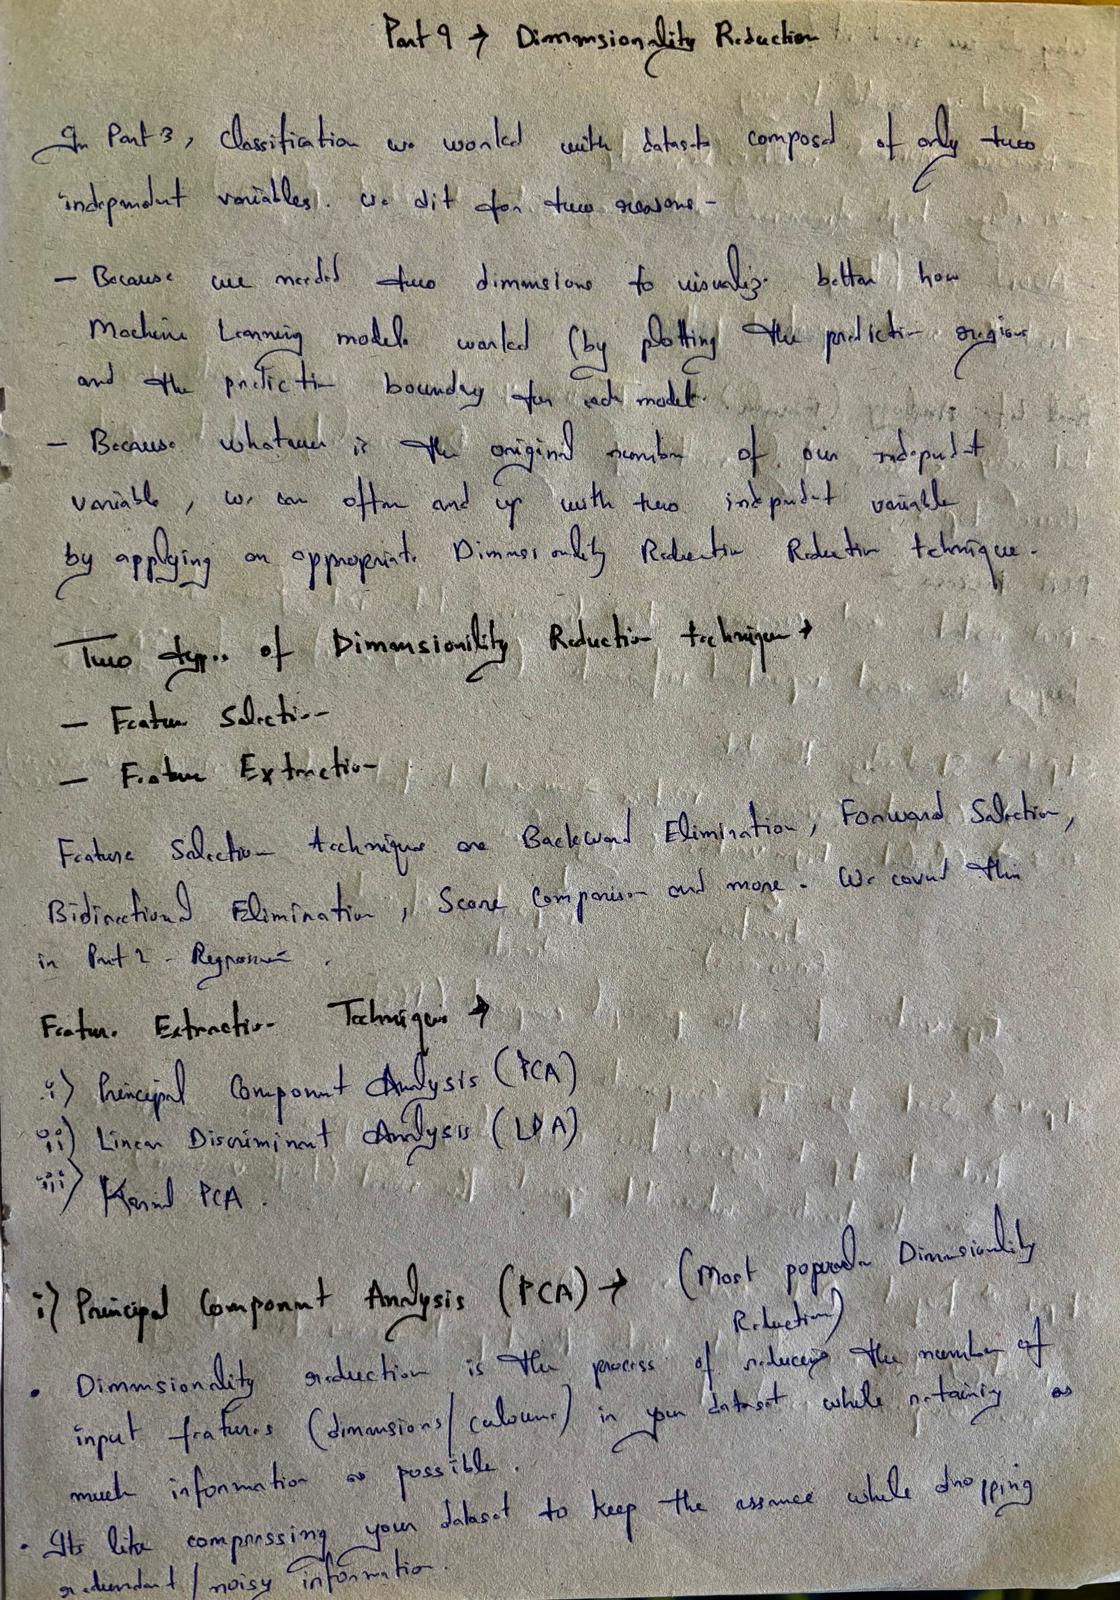

Great question! 🌟

---

## 🧠 What is Dimensionality Reduction?

> **Dimensionality reduction** is the process of reducing the number of **input features (dimensions/columns)** in your dataset **while retaining as much information as possible**.

It's like compressing your dataset to keep the **essence** while dropping redundant/noisy information.

---

### 🔷 Why Do We Need It?

* 🚀 **Speed up model training**
* ❌ **Remove noise & multicollinearity**
* 📊 **Visualize high-dimensional data** (e.g., reduce to 2D for plotting)
* ✅ **Avoid overfitting**
* 🧠 **Find the most important patterns**

---

### 📌 Real-Life Analogy

Imagine you have a resume with **100 lines**, but only 5 lines truly matter for hiring. Dimensionality reduction picks those top 5!

---

## 🔧 Common Techniques

| Method                                 | Type              | Description                                                  |
| -------------------------------------- | ----------------- | ------------------------------------------------------------ |
| **PCA** (Principal Component Analysis) | Linear            | Projects data onto new axes (directions of max variance)     |
| **LDA** (Linear Discriminant Analysis) | Supervised Linear | Reduces features while maximizing class separability         |
| **t-SNE** / **UMAP**                   | Nonlinear         | Used for **visualization**; keeps similar points together    |
| **Autoencoders**                       | Deep Learning     | Neural network that learns to compress then reconstruct data |

---

### 📊 Example Use Case:

You have 1000 features from genomic data. PCA reduces them to 20 new "meta features" that still explain 95% of the variance — much faster and clearer to train a model on.

---

### 📉 Visualization Example

Before:

* 100 features → impossible to plot

After PCA:

* Reduced to 2 features → plotted easily in 2D with clusters

---


Absolutely! Let’s break down **PCA (Principal Component Analysis)** into simple, step-by-step logic using a clear analogy and visuals.

---

## 🧠 **What PCA Does (in Simple Terms)**

> PCA **rotates and compresses** high-dimensional data into fewer dimensions, keeping the **most important information** (variance).

---

### 🎯 Real-Life Analogy:

Imagine taking photos of a **3D object (say, a statue)**. If you want to represent it in 2D, you take the **best angle** that captures its shape and detail.
That’s exactly what PCA does mathematically — **projects data to a lower dimension** without losing much meaning.

---

## ✅ Step-by-Step PCA Process

Let’s go from 3D → 2D (same for 4D → 2D):

---

### 🔹 Step 1: **Standardize the Data**

Make all features have mean = 0 and std = 1.

```python
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
```

> 🎯 Why? So that one feature (like cm or kg) doesn't dominate due to its scale.

---

### 🔹 Step 2: **Compute Covariance Matrix**

Covariance tells us how two features vary together.

|    | F1  | F2  |
| -- | --- | --- |
| F1 | σ²  | σ₁₂ |
| F2 | σ₁₂ | σ²  |

> 🎯 We want to find directions (axes) where variance is **maximum**.

---

### 🔹 Step 3: **Calculate Eigenvectors & Eigenvalues**

* **Eigenvectors** → directions (new axes)
* **Eigenvalues** → importance of each direction

> 🎯 Eigenvectors form the **principal components (PCs)**

---

### 🔹 Step 4: **Sort by Top Components**

Pick the top `k` eigenvectors with largest eigenvalues — these are the directions where **data spreads the most** (high variance).

---

### 🔹 Step 5: **Project Data onto New Axes**

Multiply the original data with the top-k eigenvectors to get the new compressed coordinates.

```python
X_pca = X.dot(top_k_eigenvectors)
```

Now `X_pca` is 2D (or 3D), while preserving most of the info.

---

## 🔍 Visually:

* Original Data (4D) → PCA → (2D)
* Rotated to a new coordinate system
* You can **plot**, **cluster**, or **train models faster**

---

### 💡 PCA Doesn’t Know Labels

It’s **unsupervised** — just captures patterns of variance in features.

---

## 🔁 Recap

| Step | What it does                  |
| ---- | ----------------------------- |
| 1️⃣  | Standardize data              |
| 2️⃣  | Compute covariance matrix     |
| 3️⃣  | Find eigenvectors/eigenvalues |
| 4️⃣  | Select top k components       |
| 5️⃣  | Project data into new space   |

---


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying PCA

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

## Visualising the Training set results

/tmp/ipython-input-8-3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


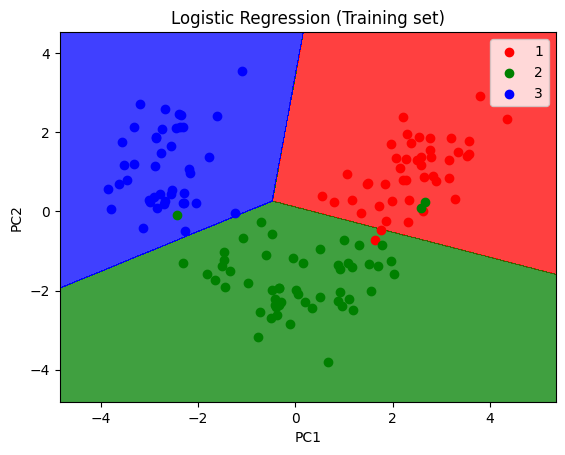

In [8]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

/tmp/ipython-input-9-3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


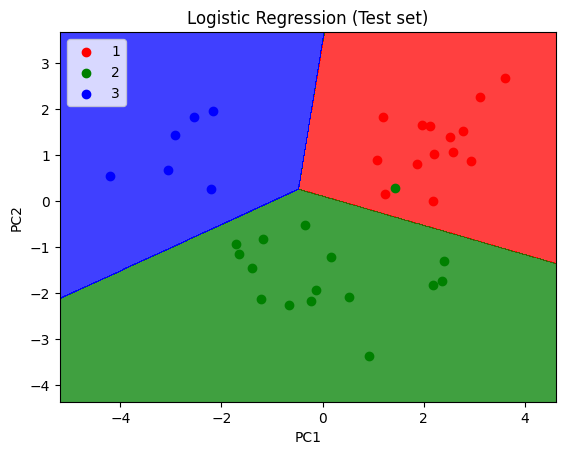

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()